In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, explained_variance_score,
    median_absolute_error, max_error, mean_squared_log_error
)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import itertools

from itertools import combinations


from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/home/karan/pyKaran/CarbonEmissions/carbon emissions data - Sheet3.csv")

In [3]:
df

,EDGAR Country Code,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,IND,India,0.710332,0.733341,0.711633,0.694627,0.67532,0.653968,0.626258,0.622575,...,0.384204,0.359561,0.350895,0.342722,0.330572,0.333476,0.326725,0.323373,0.314455,0.306949
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Keep only first row (India)
row = df.iloc[0]

# Extract year columns (1970–2024)
years = [str(y) for y in range(1990, 2025)]
ts = row[years].astype(float)

# Convert to pandas time-series
ts.index = pd.to_datetime(ts.index, format="%Y")

In [6]:
ts

1990-01-01    0.710332
1991-01-01    0.733341
1992-01-01    0.711633
1993-01-01    0.694627
1994-01-01    0.675320
1995-01-01    0.653968
1996-01-01    0.626258
1997-01-01    0.622575
1998-01-01    0.596805
1999-01-01    0.570245
2000-01-01    0.559787
2001-01-01    0.540976
2002-01-01    0.529209
2003-01-01    0.503642
2004-01-01    0.491356
2005-01-01    0.471117
2006-01-01    0.457539
2007-01-01    0.452426
2008-01-01    0.462518
2009-01-01    0.447609
2010-01-01    0.432772
2011-01-01    0.431736
2012-01-01    0.435039
2013-01-01    0.413858
2014-01-01    0.407889
2015-01-01    0.384204
2016-01-01    0.359561
2017-01-01    0.350895
2018-01-01    0.342722
2019-01-01    0.330572
2020-01-01    0.333476
2021-01-01    0.326725
2022-01-01    0.323373
2023-01-01    0.314455
2024-01-01    0.306949
Name: 0, dtype: float64

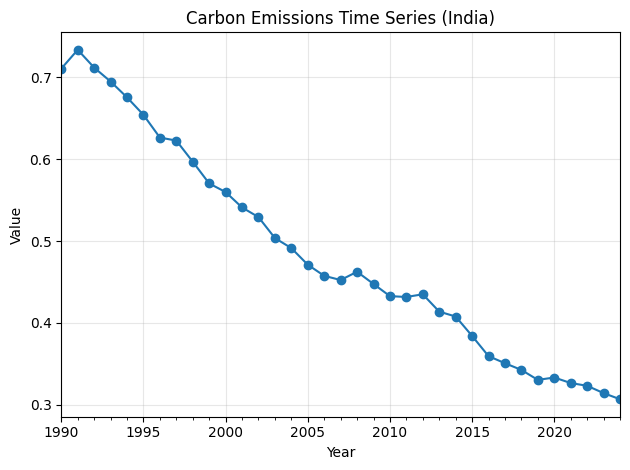

<Figure size 640x480 with 0 Axes>

In [7]:
ts.plot(marker='o')
plt.title("Carbon Emissions Time Series (India)")
plt.xlabel("Year"); plt.ylabel("Value")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig("/home/karan/pyKaran/CarbonEmissions/Sheet3Plots/original_timeSeries.png", dpi=150)

In [9]:
# Utility functions
def rss_linear(y, X):
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    resid = y - X @ beta
    return float(resid.T @ resid), beta

def bic_from_rss(rss, n, k):
    # BIC = n*log(rss/n) + k*log(n)
    return n * np.log(rss / n) + k * np.log(n)

def design_matrix_with_breaks(t, breaks):
    # t is integer index 0..N-1
    # breaks is sorted list of break indices (exclusive): split at these indices
    # Piecewise linear with continuity at breaks ("broken-stick" with hinge functions)
    n = len(t)
    X = np.ones((n, 1))  # intercept
    # baseline linear trend
    X = np.column_stack([X, t])
    for b in breaks:
        # hinge term: (t - b)_+
        hinge = np.maximum(0, t - b)
        X = np.column_stack([X, hinge])
    return X

def exhaustive_break_search(y, max_breaks=3, min_seg=5):
    """
    Exhaustive search over combinations of breakpoints up to max_breaks.
    Uses BIC to select the best model among k=0..max_breaks breaks.
    Returns dict with best breaks, BIC, RSS and betas.
    """
    n = len(y)
    t = np.arange(n)
    best = {"breaks": [], "bic": np.inf, "rss": None, "betas": None}
    # Candidate break positions (indices between segments)
    candidates = list(range(min_seg, n - min_seg + 1))
    # Always evaluate k=0 (no breaks)
    X0 = design_matrix_with_breaks(t, [])
    rss0, beta0 = rss_linear(y, X0)
    bic0 = bic_from_rss(rss0, n, X0.shape[1])
    if bic0 < best["bic"]:
        best = {"breaks": [], "bic": bic0, "rss": rss0, "betas": beta0}
    # Evaluate k=1..max_breaks
    for k in range(1, max_breaks + 1):
        for combo in itertools.combinations(candidates, k):
            # Ensure minimum segment length between breaks
            valid = True
            prev = 0
            for b in combo + (n,):
                if b - prev < min_seg:
                    valid = False
                    break
                prev = b
            if not valid:
                continue
            X = design_matrix_with_breaks(t, list(combo))
            rss, betas = rss_linear(y, X)
            bic = bic_from_rss(rss, n, X.shape[1])
            if bic < best["bic"]:
                best = {"breaks": list(combo), "bic": bic, "rss": rss, "betas": betas}
    return best 

# Utility functions
def rss_linear(y, X):
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    resid = y - X @ beta
    return float(resid.T @ resid), beta

def bic_from_rss(rss, n, k):
    # BIC = n*log(rss/n) + k*log(n)
    return n * np.log(rss / n) + k * np.log(n)

def design_matrix_with_breaks(t, breaks):
    # t is integer index 0..N-1
    # breaks is sorted list of break indices (exclusive): split at these indices
    # Piecewise linear with continuity at breaks ("broken-stick" with hinge functions)
    n = len(t)
    X = np.ones((n, 1))  # intercept
    # baseline linear trend
    X = np.column_stack([X, t])
    for b in breaks:
        # hinge term: (t - b)_+
        hinge = np.maximum(0, t - b)
        X = np.column_stack([X, hinge])
    return X

def exhaustive_break_search(y, max_breaks=3, min_seg=5):
    """
    Exhaustive search over combinations of breakpoints up to max_breaks.
    Uses BIC to select the best model among k=0..max_breaks breaks.
    Returns dict with best breaks, BIC, RSS and betas.
    """
    n = len(y)
    t = np.arange(n)
    best = {"breaks": [], "bic": np.inf, "rss": None, "betas": None}
    # Candidate break positions (indices between segments)
    candidates = list(range(min_seg, n - min_seg + 1))
    # Always evaluate k=0 (no breaks)
    X0 = design_matrix_with_breaks(t, [])
    rss0, beta0 = rss_linear(y, X0)
    bic0 = bic_from_rss(rss0, n, X0.shape[1])
    if bic0 < best["bic"]:
        best = {"breaks": [], "bic": bic0, "rss": rss0, "betas": beta0}
    # Evaluate k=1..max_breaks
    for k in range(1, max_breaks + 1):
        for combo in itertools.combinations(candidates, k):
            # Ensure minimum segment length between breaks
            valid = True
            prev = 0
            for b in combo + (n,):
                if b - prev < min_seg:
                    valid = False
                    break
                prev = b
            if not valid:
                continue
            X = design_matrix_with_breaks(t, list(combo))
            rss, betas = rss_linear(y, X)
            bic = bic_from_rss(rss, n, X.shape[1])
            if bic < best["bic"]:
                best = {"breaks": list(combo), "bic": bic, "rss": rss, "betas": betas}
    return best

In [10]:
def chow_test_at_year(ts, year):
    # Build OLS with and without interactions
    y = ts.values
    t = np.arange(len(ts))
    # Dummy for post-break
    d = (ts.index.year > year).astype(int)
    # Model with different intercept and slope after break
    X = np.column_stack([np.ones(len(t)), t, d, d * t])
    ols_full = sm.OLS(y, X).fit()
    # Restricted (no break): common intercept & slope
    Xr = sm.add_constant(t)
    ols_restr = sm.OLS(y, Xr).fit()
    # Chow F-stat manually
    rss_r = sum(ols_restr.resid**2)
    rss_u = sum(ols_full.resid**2)
    k = X.shape[1] - Xr.shape[1]  # added parameters
    n = len(y)
    f_stat = ((rss_r - rss_u) / k) / (rss_u / (n - X.shape[1]))
    from scipy.stats import f
    p_val = 1 - f.cdf(f_stat, k, n - X.shape[1])
    return {"F": float(f_stat), "p_value": float(p_val), "restricted_rss": float(rss_r),
            "unrestricted_rss": float(rss_u)}

chow_2020 = chow_test_at_year(ts, 2019)  

In [11]:
#(2) Automatic breakpoint detection (BIC-based, Bai–Perron style)

best_breaks = exhaustive_break_search(ts.values, max_breaks=3, min_seg=5)
detected_break_indices = best_breaks["breaks"]
detected_break_years = [int(ts.index[b].year) for b in detected_break_indices]

# Build fitted piecewise curve
t = np.arange(len(ts))
X_best = design_matrix_with_breaks(t, detected_break_indices)
yhat_piecewise = X_best @ best_breaks["betas"]


In [12]:
# 3) ARIMA trained separately on each regime & Final forecast

def aic_search_arima(series, p_range=range(0,4), d_range=range(0,3), q_range=range(0,4)):
    best = {"aic": np.inf, "order": None, "fit": None}
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    fit = ARIMA(series, order=(p,d,q)).fit()
                    if fit.aic < best["aic"]:
                        best = {"aic": fit.aic, "order": (p,d,q), "fit": fit}
                except Exception:
                    continue
    return best

# Split regimes using detected breaks
all_breaks = detected_break_indices + [len(ts)]
start = 0
regimes = []
for b in all_breaks:
    seg = ts.iloc[start:b]
    regimes.append((start, b, seg))
    start = b

regime_info = []
for i, (s, e, seg) in enumerate(regimes, 1):
    best = aic_search_arima(seg)
    regime_info.append({
        "Regime": i,
        "Start_Year": int(seg.index[0].year),
        "End_Year": int(seg.index[-1].year),
        "Order": best["order"],
        "AIC": best["aic"]
    })

# Forecast next 10 years from last regime model
last_seg = regimes[-1][2]
last_best = aic_search_arima(last_seg)
fit_last = last_best["fit"]
steps = 10
fc_res = fit_last.get_forecast(steps=steps)
fc_mean = fc_res.predicted_mean
fc_ci = fc_res.conf_int(alpha=0.05)
future_years = pd.date_range(ts.index[-1] + pd.offsets.YearBegin(1), periods=steps, freq="YS")
forecast_df = pd.DataFrame({
    "Year": future_years.year,
    "Forecast": np.round(fc_mean.values, 3),
    "Lower_95": np.round(fc_ci.iloc[:,0].values, 3),
    "Upper_95": np.round(fc_ci.iloc[:,1].values, 3),
})

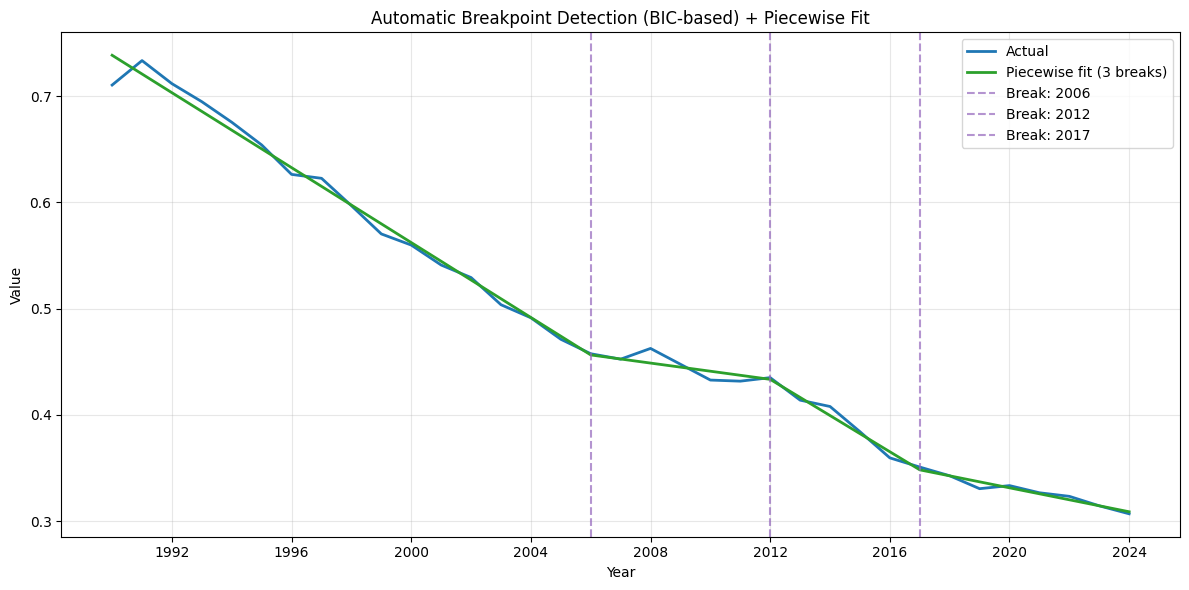

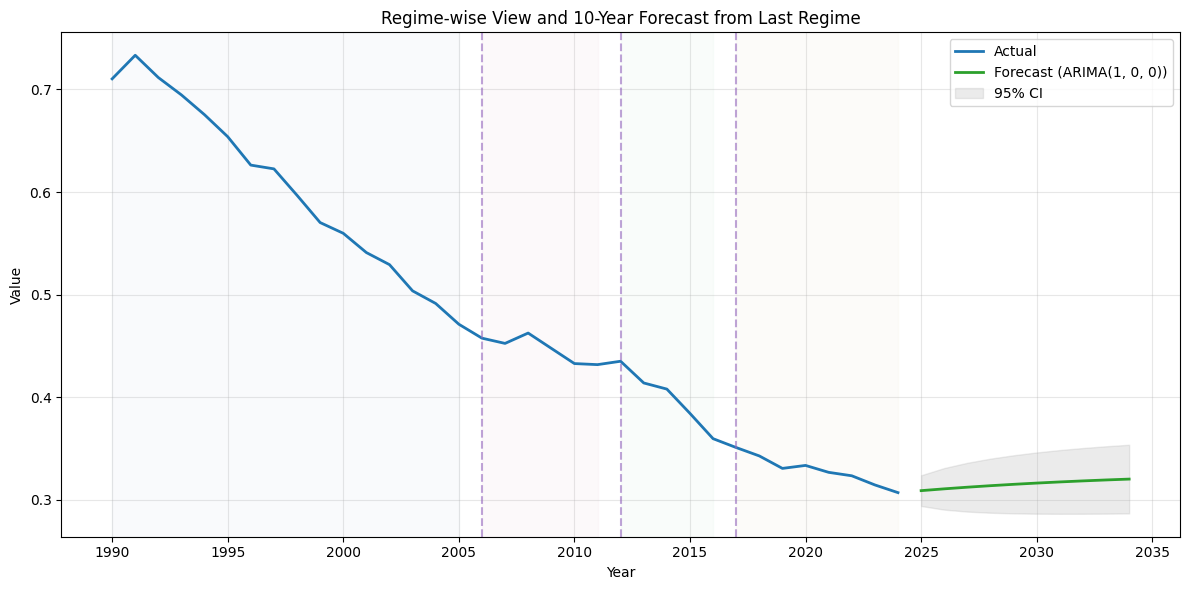

('/home/karan/pyKaran/CarbonEmissions/Sheet3csv/chow_test_2020.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet3csv/detected_breaks.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet3csv/regime_arima_summary.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet3csv/final_forecast_10y_from_last_regime.csv',
 '/home/karan/pyKaran/CarbonEmissions/Sheet3Plots/breaks_piecewise_fit.png',
 '/home/karan/pyKaran/CarbonEmissions/Sheet3Plots/regimes_and_forecast.png',
 [2006, 2012, 2017])

In [13]:
# Plots (corporate style)

c_actual = "#1f77b4"; c_piece = "#2ca02c"; c_break = "#9467bd"; c_fc = "#2ca02c"; c_ci = "#7f7f7f"

# Plot A: Piecewise fit with detected breaks
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts.values, label="Actual", color=c_actual, linewidth=2)
plt.plot(ts.index, yhat_piecewise, label=f"Piecewise fit ({len(detected_break_indices)} breaks)", color=c_piece, linewidth=2)
for b in detected_break_indices:
    year = ts.index[b].year
    plt.axvline(ts.index[b], color=c_break, linestyle="--", alpha=0.7, label=f"Break: {year}")
plt.title("Automatic Breakpoint Detection (BIC-based) + Piecewise Fit")
plt.xlabel("Year"); plt.ylabel("Value")
plt.grid(alpha=0.3)
# Avoid duplicate legend entries for multiple breaks
handles, labels = plt.gca().get_legend_handles_labels()
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plot_piece_path = "/home/karan/pyKaran/CarbonEmissions/Sheet3Plots/breaks_piecewise_fit.png"
plt.savefig(plot_piece_path, dpi=150)
plt.show()

# Plot B: Regimes + final 10-year forecast from last regime ARIMA
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts.values, label="Actual", color=c_actual, linewidth=2)
# Regime shading
prev = 0
colors = ["#E8EEF7", "#F7E8EF", "#E8F7EF", "#F7F3E8"]
for i, b in enumerate(all_breaks):
    plt.axvspan(ts.index[prev], ts.index[b-1], color=colors[i % len(colors)], alpha=0.25)
    prev = b
# Forecast with CI
plt.plot(future_years, fc_mean.values, color=c_fc, linewidth=2, label=f"Forecast (ARIMA{last_best['order']})")
plt.fill_between(future_years, fc_ci.iloc[:,0].values, fc_ci.iloc[:,1].values, color=c_ci, alpha=0.15, label="95% CI")
for b in detected_break_indices:
    plt.axvline(ts.index[b], color=c_break, linestyle="--", alpha=0.6)
plt.title("Regime-wise View and 10-Year Forecast from Last Regime")
plt.xlabel("Year"); plt.ylabel("Value")
plt.grid(alpha=0.3); plt.legend()
plt.tight_layout()
plot_regime_fc_path = "/home/karan/pyKaran/CarbonEmissions/Sheet3Plots/regimes_and_forecast.png"
plt.savefig(plot_regime_fc_path, dpi=150)
plt.show()

# -----------------------------
# Tables to download
# -----------------------------
# Chow result
chow_df = pd.DataFrame([chow_2020])
chow_path = "/home/karan/pyKaran/CarbonEmissions/Sheet3csv/chow_test_2020.csv"
chow_df.to_csv(chow_path, index=False)

# Detected breaks
breaks_df = pd.DataFrame({
    "Break_Index": detected_break_indices,
    "Break_Year": detected_break_years
})
breaks_path = "/home/karan/pyKaran/CarbonEmissions/Sheet3csv/detected_breaks.csv"
breaks_df.to_csv(breaks_path, index=False)

# Regime ARIMA table
regimes_df = pd.DataFrame(regime_info)
regimes_path = "/home/karan/pyKaran/CarbonEmissions/Sheet3csv/regime_arima_summary.csv"
regimes_df.to_csv(regimes_path, index=False)

# Forecast table
forecast_path = "/home/karan/pyKaran/CarbonEmissions/Sheet3csv/final_forecast_10y_from_last_regime.csv"
forecast_df.to_csv(forecast_path, index=False)


(chow_path, breaks_path, regimes_path, forecast_path, plot_piece_path, plot_regime_fc_path, detected_break_years)


In [14]:
# Custom intervals
intervals = [
    ("1990", "2008"),
    ("2008", "2012"),
    ("2012", "2017"),
    ("2017", "2024")
]

results = []
interval_trends = {}

# Fit trend (linear regression) for each interval
for start, end in intervals:
    segment = ts[start:end]
    y = segment.values
    t = np.arange(len(segment)).reshape(-1, 1)

    # Fit regression
    reg = LinearRegression().fit(t, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    r2 = reg.score(t, y)

    # Statsmodels for p-value
    X = sm.add_constant(t)
    model = sm.OLS(y, X).fit()
    p_value = model.pvalues[1]

    results.append({
        "Interval": f"{start}-{end}",
        "Slope": slope,
        "Intercept": intercept,
        "R²": r2,
        "Slope p-value": p_value,
        "Avg Annual Growth": slope
    })

    interval_trends[(start, end)] = (segment.index, segment.values, slope, intercept)

# Convert to DataFrame
trend_table = pd.DataFrame(results)
trend_table_path = "/home/karan/pyKaran/CarbonEmissions/Sheet1csv/interval_trend_analysis.csv"
trend_table.to_csv(trend_table_path, index=False)
print(trend_table)


    Interval     Slope  Intercept        R²  Slope p-value  Avg Annual Growth
0  1990-2008 -0.016859   0.734033  0.982618   2.111013e-16          -0.016859
1  2008-2012 -0.007083   0.456101  0.725638   6.691417e-02          -0.007083
2  2012-2017 -0.017351   0.435286  0.978361   1.768725e-04          -0.017351
3  2017-2024 -0.005682   0.348533  0.952410   3.430033e-05          -0.005682


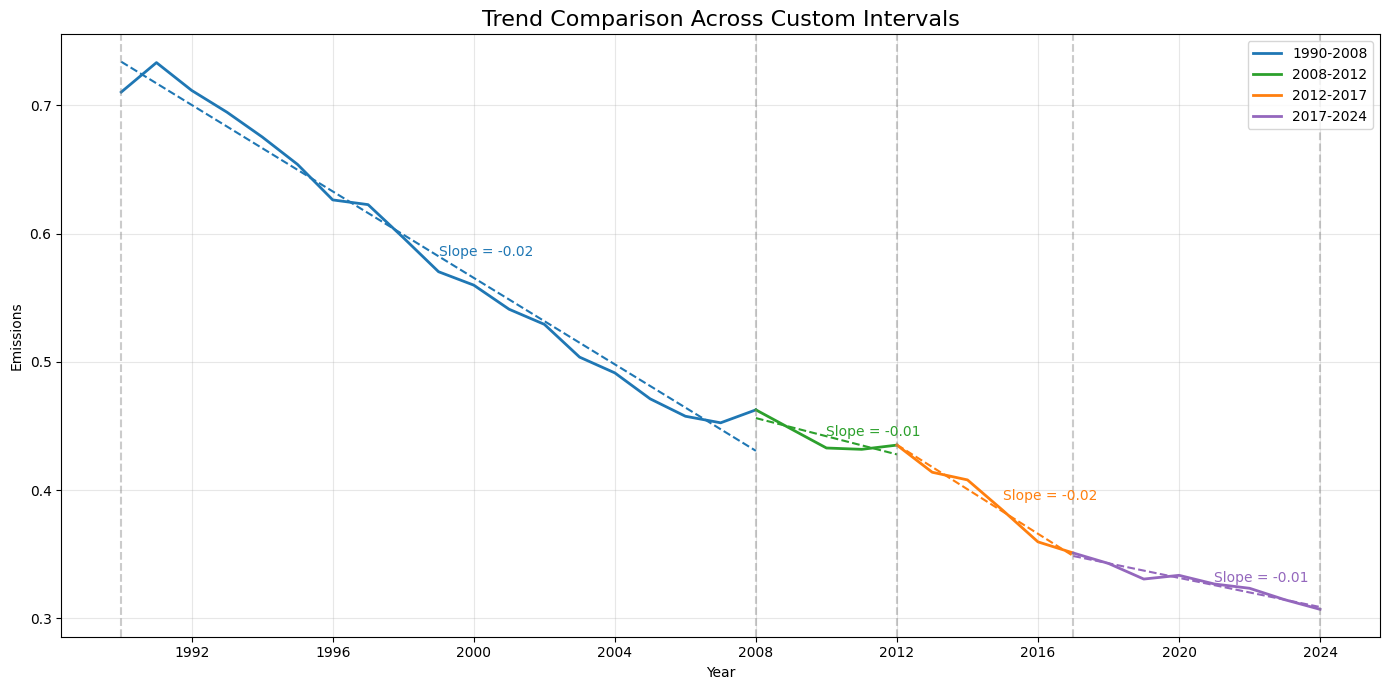

In [15]:
# Corporate colors
colors = ["#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd"]

plt.figure(figsize=(14,7))
for i, (start, end) in enumerate(intervals):
    idx, vals, slope, intercept = interval_trends[(start, end)]
    t = np.arange(len(vals))
    y_hat = intercept + slope * t

    plt.plot(idx, vals, color=colors[i], linewidth=2, label=f"{start}-{end}")
    plt.plot(idx, y_hat, color=colors[i], linestyle="--")

    # Label slope on plot
    mid = idx[len(idx)//2]
    plt.text(mid, np.mean(vals), f"Slope = {slope:.2f}", color=colors[i], fontsize=10)

# Vertical lines at boundaries
bounds = ["1990", "2008", "2012", "2017", "2024"]
for b in bounds:
    plt.axvline(pd.to_datetime(b), color="#7f7f7f", linestyle="--", alpha=0.4)

plt.title("Trend Comparison Across Custom Intervals", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
pp = "/home/karan/pyKaran/CarbonEmissions/Sheet3Plots/trend_comparison_intervals.png"
plt.savefig(pp, dpi=150)
plt.show()
